## 1. Импорт библиотек

Импортируем необходимые библиотеки:
1) `Gymnasium` — используется для работы со средой,
2) `Pygame` — для обработки ввода с клавиатуры,
3) `PyTorch` — для загрузки и применения модели,
4) `Matplotlib` — для визуализации, а кастомные модули используются для настройки модели DQN и среды.

In [12]:
import os.path

import gymnasium as gym
import pygame
import torch
import matplotlib.pyplot as plt
import numpy as np
import argparse

from model import DQN  # Импорт модели DQN из model.py
import envs  # Импорт кастомных определений среды и действий (Env-v0, Action, Wrapper) из модуля envs

## 2. Функция `human_play`

In [3]:
def human_play():
    env = gym.make("Env-v0", render_mode="human")
    obs, _ = env.reset()

    total_reward = 0.0
    n_frames = 0
    while True:
        n_frames += 1
        userInput = pygame.key.get_pressed()
        action = envs.Action.STAND  # Действие по умолчанию

        if userInput[pygame.K_UP] or userInput[pygame.K_SPACE]:
            action = envs.Action.JUMP
        elif userInput[pygame.K_DOWN]:
            action = envs.Action.DUCK

        obs, reward, terminated, _, _ = env.step(action)
        total_reward += float(reward)

        if terminated:
            break

    print(f"Итоговая награда: {total_reward}, количество кадров: {n_frames}")
    env.close()

    # Показ изображения последнего кадра
    plt.imshow(obs)
    plt.show()


*Эта функция позволяет человеку управлять средой вручную, используя клавиатуру (вверх, вниз или пробел для прыжка, приседания или обычного действия). Она инициализирует среду, обрабатывает действия игрока и показывает итоговую награду и количество кадров после завершения игры. В конце выводится изображение последнего кадра.

## 3. Функция `play_with_model`

In [4]:
def play_with_model(
    env: envs.Wrapper,
    policy_net: DQN,
    device: torch.device,
    seed: int | None = None,
) -> float:
    if seed is not None:
        state, _ = env.reset(seed=seed)
    else:
        state, _ = env.reset()

    state = torch.tensor(state, device=device)

    total_reward = 0.0
    while True:
        action = policy_net(state.unsqueeze(0)).max(dim=1)[1][0]
        state, reward, terminated, _, _ = env.step(action)
        state = torch.tensor(state, device=device)
        
        total_reward += float(reward)
        if terminated:
            break

    return total_reward


Эта функция запускает игру автономно, используя обученную модель (`DQN`) для выбора действий. Модель принимает решения, основываясь на текущем состоянии среды. Функция вычисляет и возвращает общую награду, полученную моделью.

Параметр `device` позволяет использовать CPU или GPU.

## 4. Функция `ai_play`

In [5]:
def ai_play(model_path: str):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    policy_net = torch.load(model_path, map_location=device).to(device)
    policy_net.eval()

    env = gym.make("Env-v0", render_mode="human")
    env = envs.Wrapper(env)

    total_reward = play_with_model(env, policy_net, device)

    print(f"Итоговая награда: {total_reward}, количество кадров: {len(env.frames)}")
    env.close()

    # Показ изображения последнего кадра
    plt.imshow(env.frames[-1])
    plt.show()

 Эта функция загружает предобученную модель из `model_path` и использует её для автономного прохождения игры. `ai_play` загружает модель, запускает игру с использованием модели в качестве агента и выводит итоговую награду и количество кадров. Как и в `human_play`, отображается последний кадр игры.

## 5. Запуск игры

### 5.1. С использованием клавиатуры

Итоговая награда: 19.0, количество кадров: 626


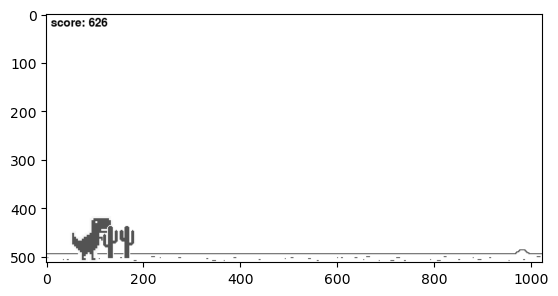

In [9]:
# Основной код выполнения
play_type = "human"  
human_play()

### 5.2. С использованием предобученной модели

In [23]:
# Основной код выполнения
play_type = "ai"
models_folder = './results/24-11-10-17-09'

model_50 = 'model-50.pth'
model_250 = 'model-250.pth'
model_500 = 'model-500.pth'
model_950 = 'model-950.pth'

C:\Users\Legion\AppData\Local\Temp\ipykernel_4320\1864441832.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_net = torch.load(model_path, map_location=device).to(

Итоговая награда: -1.0, количество кадров: 63


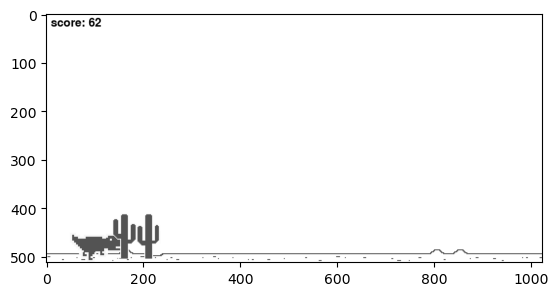

In [25]:
model_path = os.path.join(models_folder, model_50)  # Укажите путь к вашей модели для игры с ИИ
ai_play(model_path)

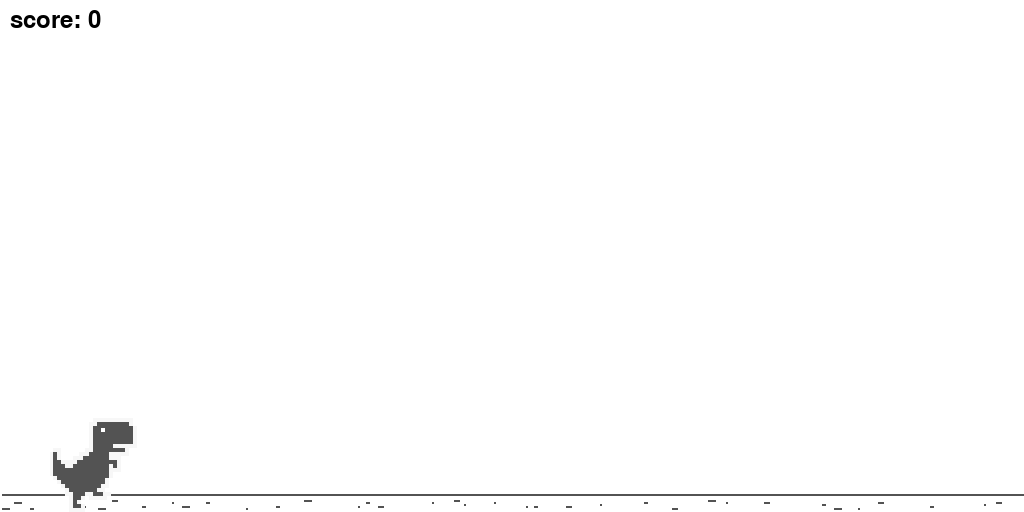

In [27]:
from IPython.display import Image
gif_path = os.path.join(models_folder, 'episode-50.gif')
Image(filename=gif_path)

C:\Users\Legion\AppData\Local\Temp\ipykernel_4320\1864441832.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_net = torch.load(model_path, map_location=device).to(

Итоговая награда: 0.0, количество кадров: 162


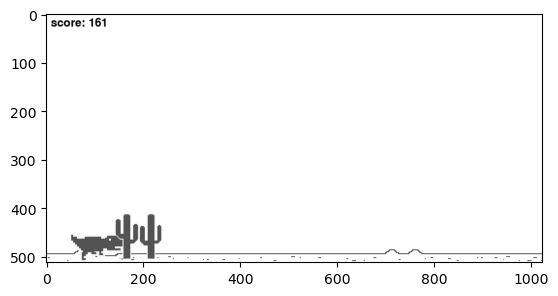

In [26]:
model_path = os.path.join(models_folder, model_250)  # Укажите путь к вашей модели для игры с ИИ
ai_play(model_path)

C:\Users\Legion\AppData\Local\Temp\ipykernel_4320\1864441832.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_net = torch.load(model_path, map_location=device).to(

Итоговая награда: 2.0, количество кадров: 362


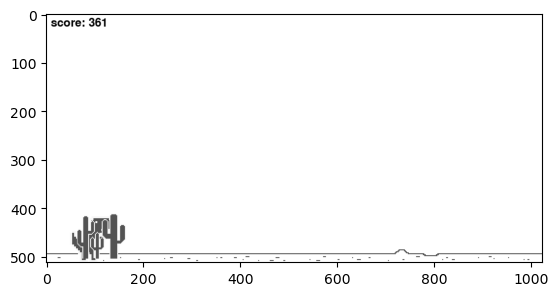

In [20]:
model_path = os.path.join(models_folder, model_500)  # Укажите путь к вашей модели для игры с ИИ
ai_play(model_path)

C:\Users\Legion\AppData\Local\Temp\ipykernel_4320\1864441832.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_net = torch.load(model_path, map_location=device).to(

Итоговая награда: 18.0, количество кадров: 679


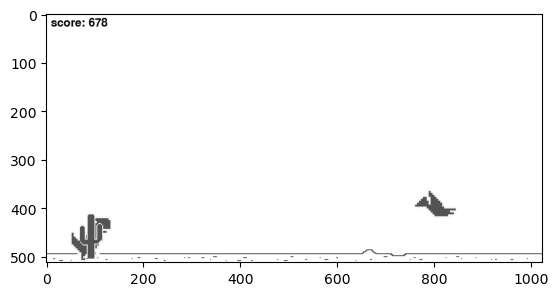

In [18]:
model_path = os.path.join(models_folder, model_950)  # Укажите путь к вашей модели для игры с ИИ
ai_play(model_path)

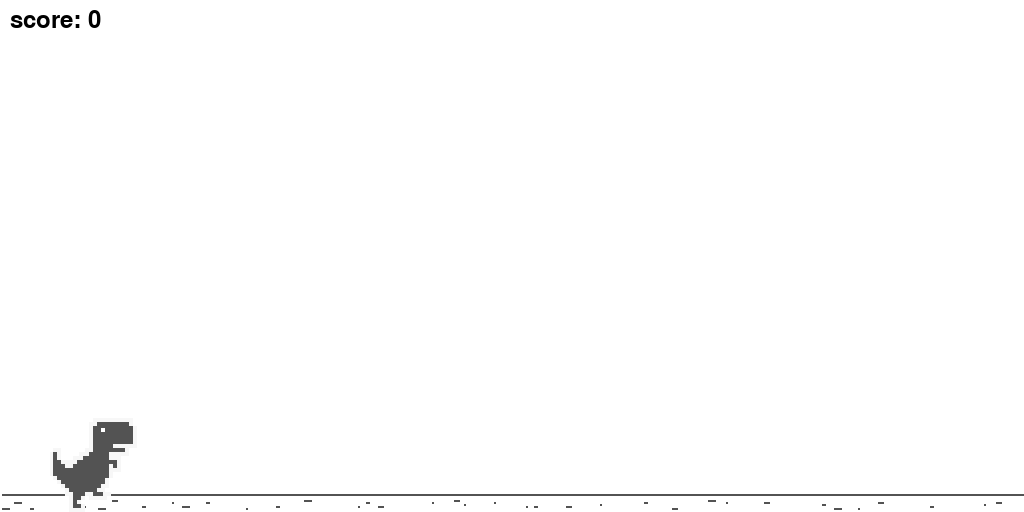

In [29]:
from IPython.display import Image
gif_path = os.path.join(models_folder, 'episode-900.gif')
Image(filename=gif_path)